# Aircraft Wildlife Strikes

This goal of this project is to analyze aircraft wildlife strike data from the incidents were sourced from the Federal Aviation Administration (FAA) Wildlife Strike Database.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.
Here are a few questions that this project has sought to answer:
- What species of bird is involved in a strike?
- What state and province experience the most strike on a per capita basis
- Is there a statitically significant relationship between airplane model and strike frequency?
- How has strikes volume changed over time?
- What time of year do strike mainly happen?

Data sources:
STRIKE_REPORTS.csv was provided by Kaggle.com.
- https://www.kaggle.com/datasets/dianaddx/aircraft-wildlife-strikes-1990-2023

## Looking Over the Data

Review the datasets to get a sense of the types of variables in the data and the structure of the table. 

In [107]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# Upload dataset and review the dataset
df = pd.read_csv('STRIKE_REPORTS.csv')
pd.set_option('display.max_columns', None)

/var/folders/ds/djp1xt_s7tz0zm9zv957dll00000gn/T/ipykernel_1112/3367127092.py:2: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('STRIKE_REPORTS.csv')


In [109]:
# Summary overview of the dataframe
print('Overview of data types:')
print(df.info(), '\n' )

# Review the percentage of null values
null_percentage = df.isnull().mean() * 100
print('% of null values:')
print(null_percentage, '\n')

# Number of unique values
print('Number of unique values:')
print(df.nunique())

Overview of data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               288810 non-null  int64  
 1   INCIDENT_DATE          288810 non-null  object 
 2   INCIDENT_MONTH         288810 non-null  int64  
 3   INCIDENT_YEAR          288810 non-null  int64  
 4   TIME                   163633 non-null  object 
 5   TIME_OF_DAY            166394 non-null  object 
 6   AIRPORT_ID             288804 non-null  object 
 7   AIRPORT                288810 non-null  object 
 8   LATITUDE               253309 non-null  float64
 9   LONGITUDE              253308 non-null  float64
 10  RUNWAY                 218852 non-null  object 
 11  STATE                  253309 non-null  object 
 12  FAAREGION              253309 non-null  object 
 13  LOCATION               33939 non-null   object 
 14  ENROUTE_STA

In [110]:
# Review unique values by column
def count_values(df, column_name):
    # Count the number of unique values in the column
    unique_count = df[column_name].nunique()
    # Get value counts for each unique value in the column
    value_counts = df[column_name].value_counts()
    return unique_count, value_counts

# Create a column list
df_columns = list(df.columns[5:8]) + list(df.columns[11:])

for column_name in df_columns:
    unique_count, column_values = count_values(df, column_name)
    print(f'{column_name} - Number of unique values:', unique_count)
    print(column_values, '\n')


TIME_OF_DAY - Number of unique values: 4
TIME_OF_DAY
Day      102548
Night     50446
Dusk       7428
Dawn       5972
Name: count, dtype: int64 

AIRPORT_ID - Number of unique values: 2609
AIRPORT_ID
ZZZZ    35418
KDEN     9620
KDFW     7759
KORD     6239
KJFK     5984
        ...  
KEKX        1
UUDD        1
8D4         1
N03         1
KMVC        1
Name: count, Length: 2609, dtype: int64 

AIRPORT - Number of unique values: 2615
AIRPORT
UNKNOWN                                35418
DENVER INTL AIRPORT                     9620
DALLAS/FORT WORTH INTL ARPT             7759
CHICAGO O'HARE INTL ARPT                6239
JOHN F KENNEDY INTL                     5984
                                       ...  
BRIGHAM & WOMEN'S HOSPITAL HELIPORT        1
BANGALORE INTL ARPT                        1
LOGAN COUNTY ARPT                          1
DEMOPOLIS MUNICIPAL ARPT                   1
MONROE COUNTY ARPT                         1
Name: count, Length: 2615, dtype: int64 

STATE - Number of un

## Cleaning the Data

Remove data based on relevance and null percentage

In [111]:
# Put all column titles to lowercase
df.columns = df.columns.str.lower()

In [112]:
df = df[['index_nr', 'incident_date', 'incident_month', 'incident_year', 'time',
       'airport', 'state', 'faaregion', 'location', 'enroute_state',
         'operator',  'aircraft', 'ac_class', 'ac_mass', 'type_eng', 'num_engs', 
         'phase_of_flight', 'height', 'speed','distance', 'indicated_damage', 'damage_level', 
         'effect', 'species', 'warned', 'num_seen', 'num_struck','size', 'nr_injuries', 'nr_fatalities']]
         #'time_of_day', 'airport_id',  #'runway',#'opid', #'reg', 'flt', #'ama', 'amo', 'ema', 'emo', 'latitude', 'longitude'
       #'eng_1_pos', 'eng_2_pos','eng_3_pos', 'eng_4_pos', #'sky', 'precipitation', 'aos', 'cost_repairs', 
         #'cost_other', 'cost_repairs_infl_adj', 'cost_other_infl_adj', 'ingested_other',
        #'str_rad', 'dam_rad','str_windshld', 'dam_windshld', 'str_nose', 'dam_nose', 'str_eng1', 'dam_eng1', 'ing_eng1', 'str_eng2', 'dam_eng2', 'ing_eng2', 'str_eng3', 'dam_eng3', 'ing_eng3', 'str_eng4', 'dam_eng4', 'ing_eng4', 'str_prop','dam_prop', 'str_wing_rot', 'dam_wing_rot', 'str_fuse', 'dam_fuse','str_lg', 'dam_lg', 'str_tail', 'dam_tail', 'str_lghts', 'dam_lghts','str_other', 'dam_other', 'other_specify', 
        #'effect_other','bird_band_number', 'species_id', 
        #'remarks', 'remains_sent''remains_collected', , 
        #'comments', 'reported_name','reported_title', 'source', 'person', 'lupdate', 'transfer']

In [113]:
# Convert data to proper data type

# Convert to date format
df['incident_date'] = pd.to_datetime(df['incident_date'], format='%m/%d/%Y')

# Convert to date format
#df['incident_month'] = pd.to_datetime(df['incident_month'], format='%m')
df['incident_month'] = df['incident_date'].dt.month_name()

# Convert 'incident_year' to datetime format
df['incident_year'] = pd.to_datetime(df['incident_year'], format='%Y')

# List of columns to convert to string
df['index_nr'] = df['index_nr'].astype(str)

In [114]:
# Convert damage level code to damage classification
df['damage_level'] = df['damage_level'].apply(lambda dl: 'None' if dl == 'N' else ('Minor' if dl == 'M' else ('Undetermined_Level' if dl == 'M?' else ('Substantial' if dl == 'S' else 'Destroyed' if dl == 'D' else dl))))

# Convert aircraft class code to aircraft classification
df['ac_class'] = df['ac_class'].apply(lambda ac: 'Airplane' if ac == 'A' else ('Helicopter' if ac == 'B' else ('Glider' if ac == 'C' else ac)))

# Convert engine class code to engine classification
df['type_eng'] = df['type_eng'].apply(lambda eng: 'Reciprocating_Engine' if eng == 'A' else ('Turbojet' if eng == 'B' else ('Turboprop' if eng == 'C' else ('Turbofan' if eng == 'D' else ('None_Glider' if eng == 'E' else ('' if eng == 'F' else ('Other' if eng == 'Y' else eng )))))))

In [115]:
# Identify duplicate rows
duplicates = df[df.duplicated()]
duplicates

,index_nr,incident_date,incident_month,incident_year,time,airport,state,faaregion,location,enroute_state,operator,aircraft,ac_class,ac_mass,type_eng,num_engs,phase_of_flight,height,speed,distance,indicated_damage,damage_level,effect,species,warned,num_seen,num_struck,size,nr_injuries,nr_fatalities


No duplicate rows identified

In [116]:
# Summary overview of the data
df.describe(include='all')

,index_nr,incident_date,incident_month,incident_year,time,airport,state,faaregion,location,enroute_state,operator,aircraft,ac_class,ac_mass,type_eng,num_engs,phase_of_flight,height,speed,distance,indicated_damage,damage_level,effect,species,warned,num_seen,num_struck,size,nr_injuries,nr_fatalities
count,288810,288810,288810,288810,163633,288810,253309,253309,33939,5037,288810,288810,206893,206490.000000,206044,206259.000000,177843,148807.000000,94237.000000,188234.000000,288810,187315,13718,288809,288810,94773,288174,263538,276.000000,24.000000
unique,288810,NaN,12,NaN,1563,2615,67,10,8906,58,602,603,5,NaN,7,NaN,11,NaN,NaN,NaN,2,5,11,912,3,4,4,3,NaN,NaN
top,608242,NaN,August,NaN,08:00,UNKNOWN,TX,ASO,FOUND KCLT,FL,UNKNOWN,UNKNOWN,Airplane,NaN,Turbofan,NaN,Approach,NaN,NaN,NaN,False,None,Precautionary Landing,Unknown bird - small,Unknown,1,1,Small,NaN,NaN
freq,1,NaN,41194,NaN,1732,35418,24794,53932,985,518,81307,81535,202514,NaN,173315,NaN,75224,NaN,NaN,NaN,269068,167573,7965,48901,176227,56751,255434,178749,NaN,NaN
mean,NaN,2012-04-01 21:14:57.251480064,NaN,2011-09-13 00:11:25.073231360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.538312,NaN,2.013929,NaN,865.960358,142.585057,0.814466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.293478,2.041667
min,NaN,1990-01-02 00:00:00,NaN,1990-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,NaN,2006-07-20 00:00:00,NaN,2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,2.000000,NaN,0.000000,120.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
50%,NaN,2014-03-17 00:00:00,NaN,2014-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,2.000000,NaN,50.000000,140.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.500000
75%,NaN,2019-03-16 00:00:00,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,2.000000,NaN,900.000000,160.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000
max,NaN,2023-11-14 00:00:00,NaN,2023-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,4.000000,NaN,31300.000000,1250.000000,99.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,8.000000


In [117]:
# Find interquartile range for height
height_p25 = df['height'].quantile(0.25)
height_p75 = df['height'].quantile(0.75)
height_iqr = height_p75 - height_p25

# Find height upper and lower limit
height_upper_limit = height_p75 + 1.5 * height_iqr
height_lower_limit = height_p25 - 1.5 * height_iqr

# View outlier rows for height
df = df[(df['height'] > height_lower_limit) & (df['height'] < height_upper_limit)]


# Find interquartile range for speed
speed_p25 = df['speed'].quantile(0.25)
speed_p75 = df['speed'].quantile(0.75)
speed_iqr = speed_p75 - speed_p25

# Find speed upper and lower limit
speed_upper_limit = speed_p75 + 1.5 * speed_iqr
speed_lower_limit = speed_p25 - 1.5 * speed_iqr

# Remove outlier rows for speed
df = df[(df['speed'] > speed_lower_limit) & (df['speed'] < speed_upper_limit)]

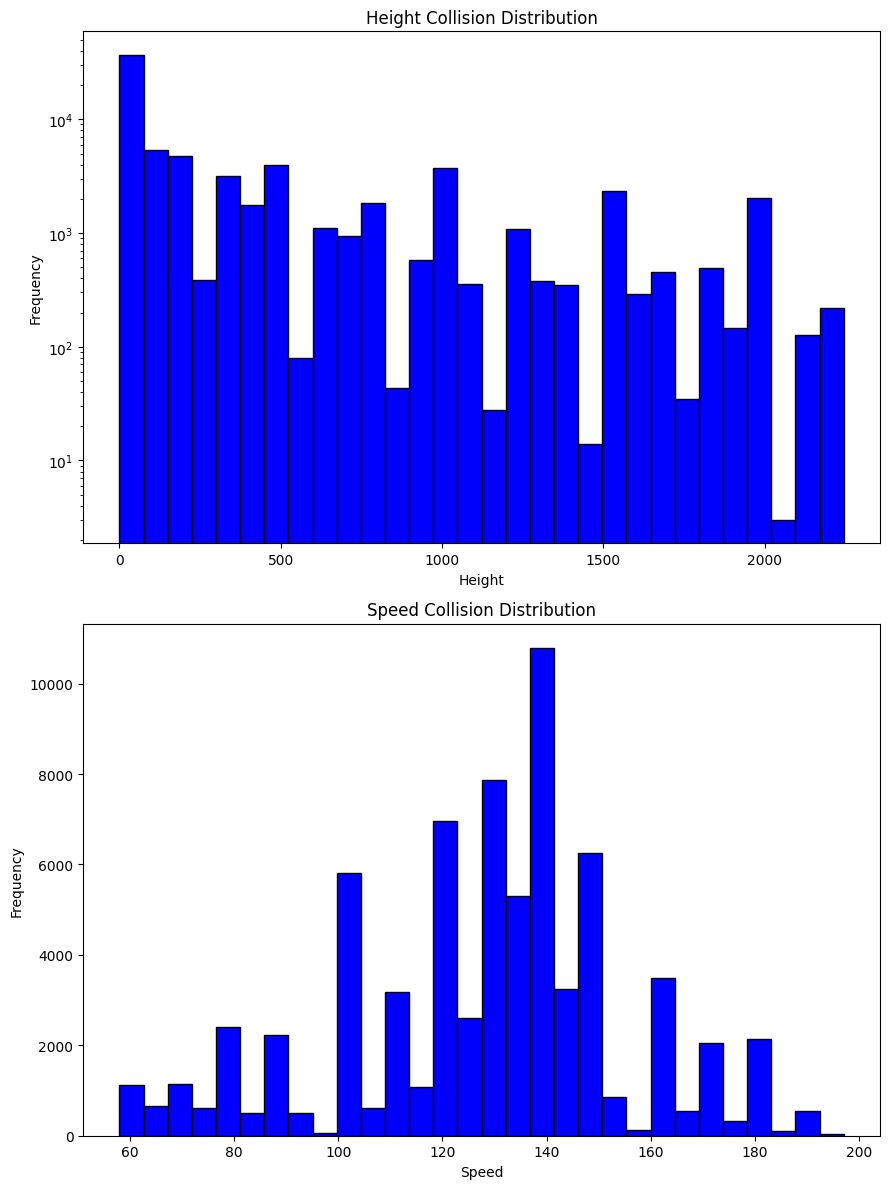

In [118]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 1, figsize=(9, 12))

#Order height values
height_sorted = sorted(df['height'])

# Plot the number of incidents by height
axs[0].hist(height_sorted, bins=30,  color='blue', edgecolor='black', log=True)
axs[0].set_title('Height Collision Distribution')
axs[0].set_xlabel('Height')
axs[0].set_ylabel('Frequency')

# Order speed column
speed_sorted = sorted(df['speed'])

# Plot the number of incidents by speed
axs[1].hist(speed_sorted, bins=30, color='blue', edgecolor='black')
axs[1].set_title('Speed Collision Distribution')
axs[1].set_xlabel('Speed')
axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()
plt.close()

## Descriptive Statistics

Highlights key insights into incident patterns, including time of year, time of day, and region, facilitating a deeper understanding of factors influencing aviation safety.

In [119]:
# Count the volume of incidents per year
year_counts = df['incident_year'].dt.year.value_counts().reset_index()
year_counts.columns = ['incident_year', 'volume']

# Count the volume of incidents per month
incident_month = df['incident_month'].value_counts().reset_index()
incident_month.columns = ['month', 'collision_volume']

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Remove null values and sort time data
incident_time = df.time[df['time'].notna()]
incident_time = sorted(incident_time)

# Empty list of incident hours
hours = []

# Fill incident hours list
for time in incident_time:
    hour = int(time.split(':')[0])
    hours.append(hour)

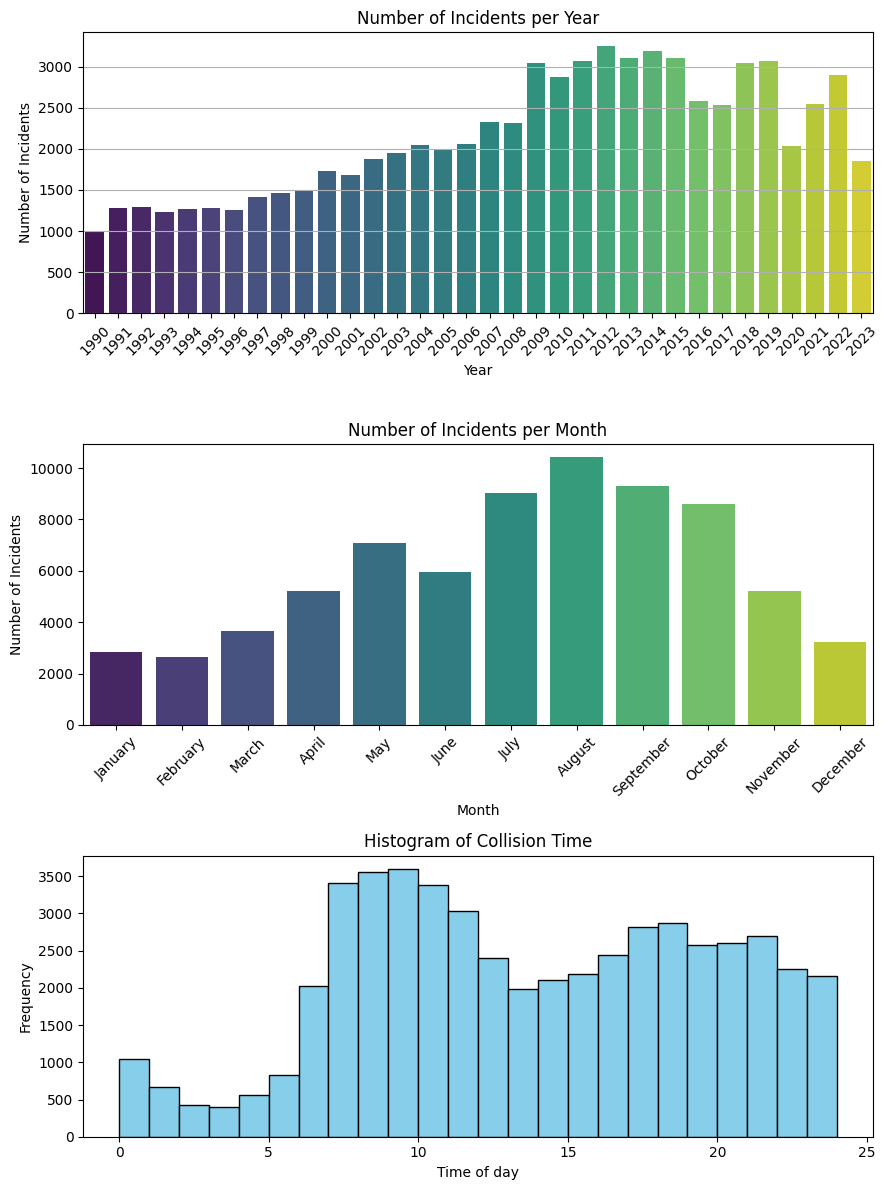

In [120]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(9, 12))

# Plot the number of incidents per year
sns.barplot(x='incident_year', y='volume', data=year_counts, palette='viridis', ax=axs[0])
#axs[0].title('Number of Incidents per Year')
axs[0].set_title('Number of Incidents per Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of Incidents')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[0].grid(axis='y')

# Plot the number of incidents per month
sns.barplot(x='month', y='collision_volume', data=incident_month, palette='viridis', ax=axs[1], order=month_order)
axs[1].set_title('Incidents per Month')
axs[1].set_title('Incidents per Year')
axs[1].set_title('Number of Incidents per Month')
axs[1].set_xlabel('Month')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
axs[1].set_ylabel('Number of Incidents')

# Plot the number of incidents by time of hour
axs[2].hist(hours, bins=range(0, 25), color='skyblue', edgecolor='black')
axs[2].set_xlabel('Time of day')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram of Collision Time')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
plt.close()

In [121]:
# Region of the collision
collision_state_province = df['state'].value_counts().reset_index()
collision_state_province.columns = ['state_province', 'collision_volume']
collision_state_province = collision_state_province[0:11]

# State of the collision
collision_region = df['faaregion'].value_counts().reset_index()
collision_region.columns = ['region', 'collision_volume']

# Calculate the collision count for each airport
airport_collisions = df['airport'].value_counts().reset_index()
airport_collisions.columns = ['airport', 'collision_volume']

# Sort the airports by collision volume
airport_collisions = airport_collisions.sort_values(by='collision_volume', ascending=False)

# Select the top 10 known airports
top_10_airports = airport_collisions[1:11]

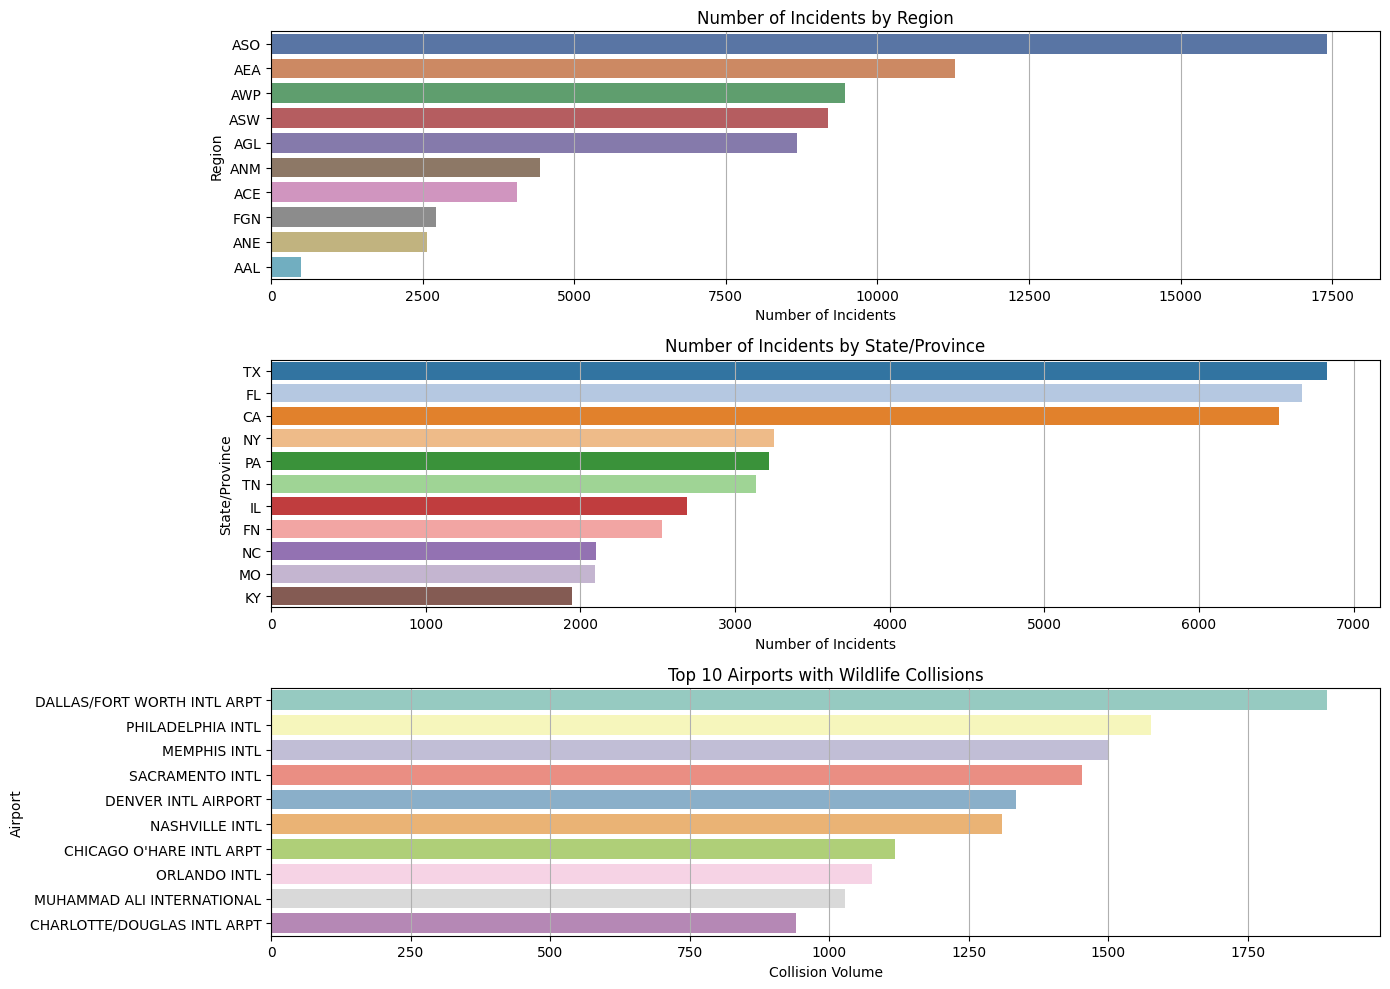

In [122]:
# Create a figure and a set of subplots with 1 row and 3 columns
fig, axs = plt.subplots(3, 1, figsize=(14, 10))

sns.barplot(x='collision_volume', y='region', data= collision_region, palette='deep', ax=axs[0])
axs[0].set_title('Number of Incidents by Region')
axs[0].set_xlabel('Number of Incidents')
axs[0].set_ylabel('Region')
axs[0].grid(axis='x')

# Visualize top 10 states/province
sns.barplot(x='collision_volume', y='state_province', data= collision_state_province, palette='tab20', ax=axs[1])
axs[1].set_title('Number of Incidents by State/Province')
axs[1].set_xlabel('Number of Incidents')
axs[1].set_ylabel('State/Province')
axs[1].grid(axis='x')

# Select the top 10 known airports
sns.barplot(x='collision_volume', y='airport', data=top_10_airports, palette='Set3', ax=axs[2])
axs[2].set_title('Top 10 Airports with Wildlife Collisions')
axs[2].set_xlabel('Collision Volume')  
axs[2].set_ylabel('Airport')
axs[2].grid(axis='x')

plt.tight_layout()
plt.show()
plt.close()

In [123]:
# Count the volume of incidents per year
damage_level = df['damage_level'].value_counts().reset_index()
damage_level.columns = ['damage', 'volume']

# Count the volume of incidents per flight phase
f_phase = df['phase_of_flight'].value_counts().reset_index()
f_phase.columns = ['phase', 'volume']
phase_order = ['Departure','Take-off Run', 'Climb','En Route','Descent','Approach','Landing Roll','Arrival','Taxi','Parked','Local']

# Wildlife involved in a collision
species_collisions = df['species'].value_counts().reset_index()
species_collisions.columns = ['species', 'volume']

## Sort the known species by collision volume
top_10_species = species_collisions.sort_values(by= 'volume', ascending=False)[0:11]

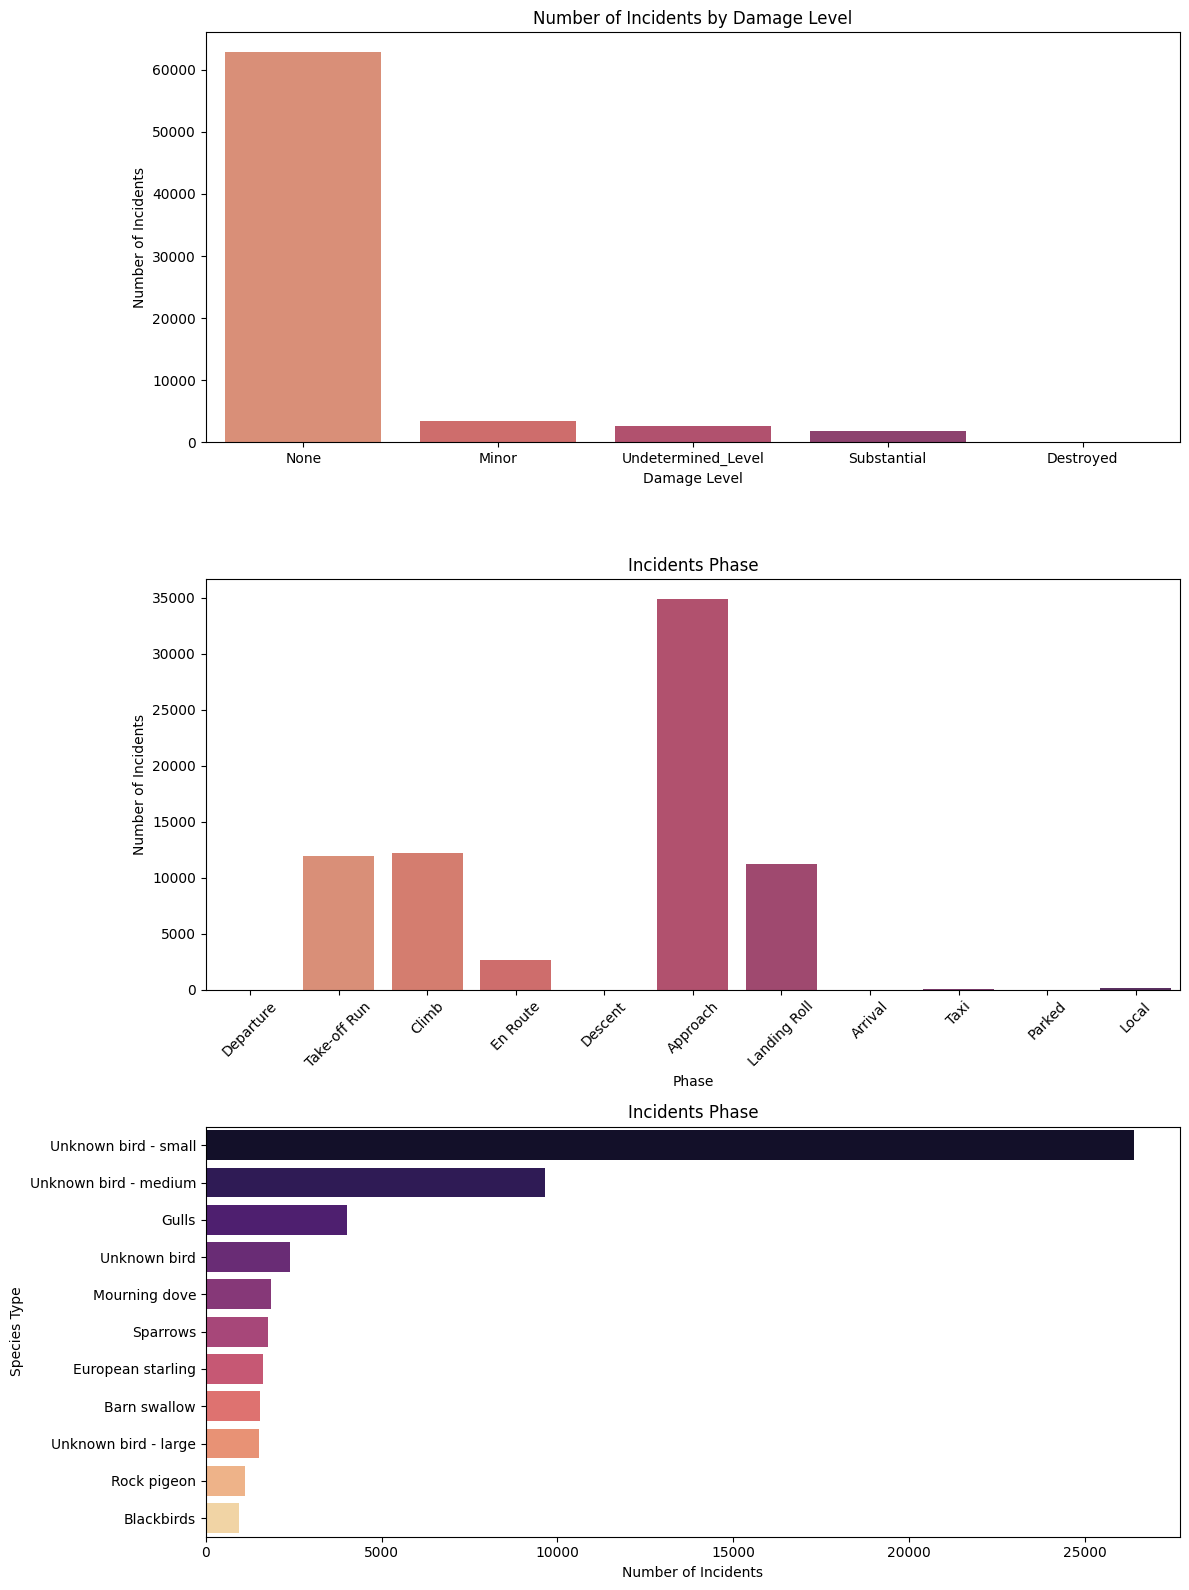

In [124]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 16))

# Display the number of incidents by damage level
sns.barplot(x='damage', y='volume', data=damage_level, palette='flare', ax=axs[0])
axs[0].set_title('Number of Incidents by Damage Level')
axs[0].set_xlabel('Damage Level')
axs[0].set_ylabel('Number of Incidents')


# Display each phase of the flight where an incident occured
sns.barplot(x='phase', y='volume', data=f_phase, palette='flare', ax=axs[1], order=phase_order)
axs[1].set_title('Incidents Phase')
axs[1].set_xlabel('Phase')
axs[1].set_ylabel('Number of Incidents')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)   


# Display the wildlife involved in the incident
sns.barplot(x='volume', y='species', data=top_10_species, palette='magma', ax=axs[2])
axs[2].set_title('Incidents Phase')
axs[2].set_xlabel('Number of Incidents')
axs[2].set_ylabel('Species Type')

# Display graphs
plt.tight_layout() 
plt.show()
plt.close()

 ## Correlation Analysis

Exploring relationships between various variables in the dataset, conducted bivariate analysis, including cross-tabulations such as phase of flight vs. damage level, effect vs. phase of flight, species size vs. number struck, and aircraft class vs. effect, culminating in visual representations like heat maps.

In [125]:
# Cross-tabulation between 'phase_of_flight' and 'damage_level'
cross_damage_phase = pd.crosstab(df['phase_of_flight'], df['damage_level'])

# Cross-tabulation between 'effect' and 'phase of flight'
cross_effect_phase = pd.crosstab(df['effect'], df['phase_of_flight'])

# Cross-tabulation between 'species top 'Size' and 'Num_struck'
cross_size_num_struck = pd.crosstab(df['size'], df['num_struck'])

# Cross-tabulation between 'ac_class' and 'effect'
cross_effect_class = pd.crosstab(df['effect'], df['ac_class'])

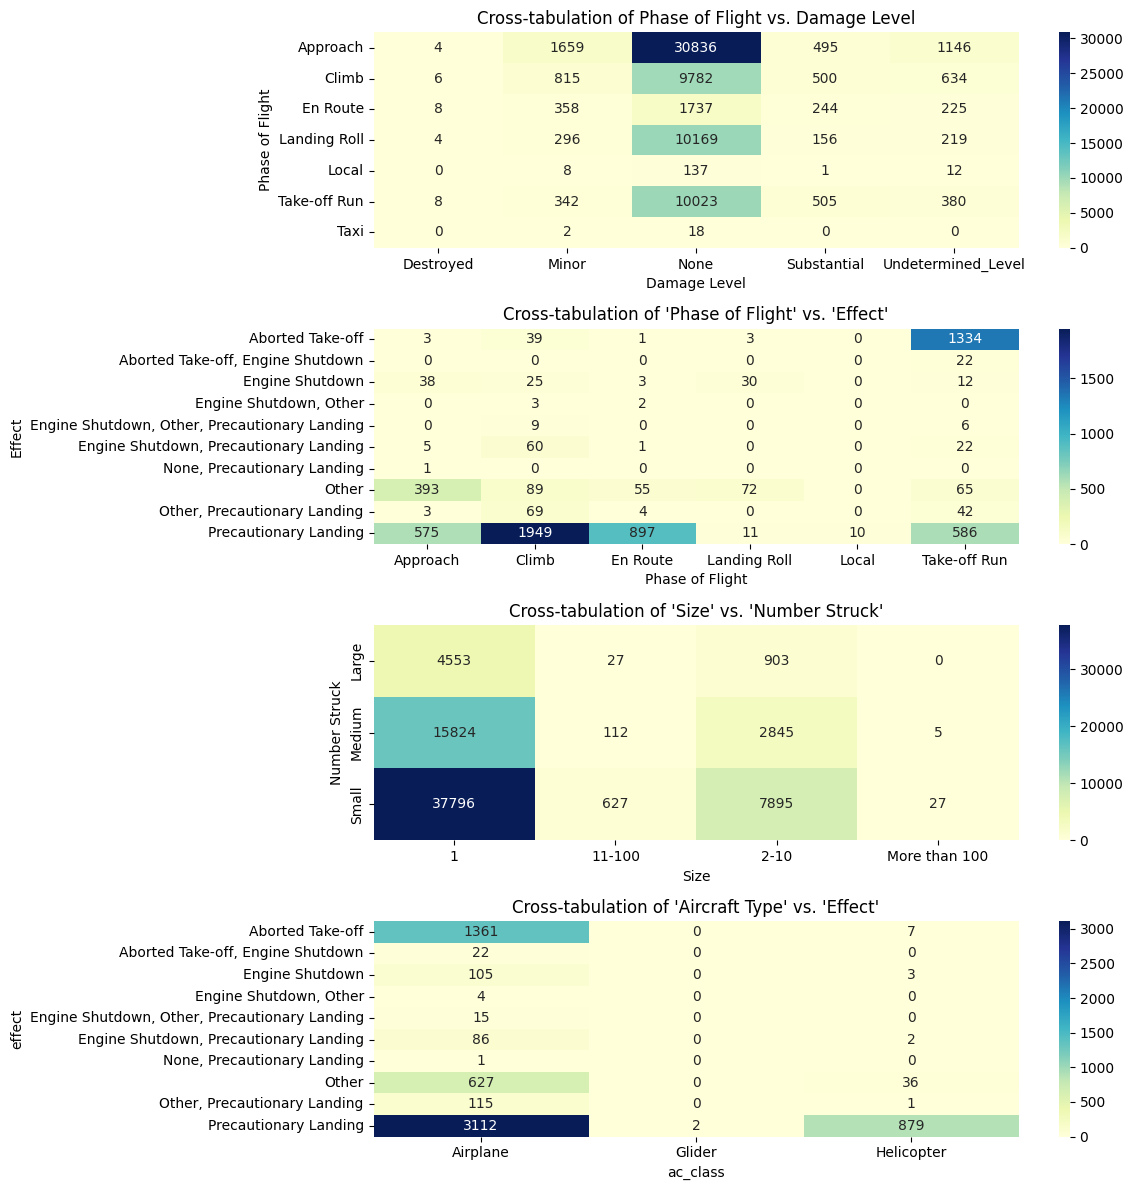

In [126]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 12))

# 
sns.heatmap(cross_damage_phase, annot=True, cmap='YlGnBu', fmt='d', ax=axs[0]) 
axs[0].set_title('Cross-tabulation of Phase of Flight vs. Damage Level') 
axs[0].set_xlabel('Damage Level')  
axs[0].set_ylabel('Phase of Flight')

#
sns.heatmap(cross_effect_phase, annot=True, cmap='YlGnBu', fmt='d', ax=axs[1]) 
axs[1].set_title("Cross-tabulation of 'Phase of Flight' vs. 'Effect'") 
axs[1].set_xlabel('Phase of Flight')  
axs[1].set_ylabel('Effect') 

#
sns.heatmap(cross_size_num_struck, annot=True, cmap='YlGnBu', fmt='d', ax=axs[2]) 
axs[2].set_title("Cross-tabulation of 'Size' vs. 'Number Struck'") 
axs[2].set_xlabel('Size')  
axs[2].set_ylabel('Number Struck')  


#
sns.heatmap(cross_effect_class, annot=True, cmap='YlGnBu', fmt='d', ax=axs[3]) 
axs[3].set_title("Cross-tabulation of 'Aircraft Type' vs. 'Effect'") 
axs[3].set_xlabel('ac_class')  
axs[3].set_ylabel('effect')  

#
plt.tight_layout() 
plt.show()
plt.close()

## Hypothesis Testing

Conduct hypothesis tests to compare proportions between different groups. 

In [127]:
# Import libraries
from scipy.stats import chi2_contingency

 #### Is there a statistically significant relationship between the aircraft type and indication of damage ?

- Null Hypothesis (H0): There is no association between the aircraft class and the indicated damage.
- Alternative Hypothesis (H1): There is an association between the aircraft class and the indicated damage.
- Significance Level (α): Let's choose a standard value of 0.05

 We'll use statistical analysis to determine if there's enough evidence to reject the null hypothesis in favor of the alternative hypothesis.

In [128]:
# Crosstabulate 'ac_class' and 'indicated_damage'
cross_tabulation = pd.crosstab(df['ac_class'], df['indicated_damage'])

# Chi-square test of independence
from scipy.stats import chi2_contingency
chi2, p_value, _, _ = chi2_contingency(cross_tabulation)

# Print the cross-tabulation and p-value
print(cross_tabulation)
print(f"P-value: {p_value}")

# Interpret the results based on the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant association between aircraft class and indicated damage.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant association between aircraft class and indicated damage.")

indicated_damage  False  True 
ac_class                      
Airplane          62922   7359
Glider                1      2
Helicopter         2022    593
P-value: 1.0116151167767473e-86
Reject the null hypothesis. There is a statistically significant association between aircraft class and indicated damage.


 #### Is there a statistically significant relationship between the phase of flight and the damage level observed in incidents ?

- Null Hypothesis (H0): There is no statistically significant relationship between the phase of flight and the damage level observed in incidents.
- Alternative Hypothesis (H1): There is a statistically significant relationship between the phase of flight and the damage level observed in incidents.
- Significance Level (α): Let's choose a standard value of 0.05

 We'll use statistical analysis to determine if there's enough evidence to reject the null hypothesis in favor of the alternative hypothesis.

In [129]:
# Cross-tabulation of phase of flight vs. damage level
cross_tab_phase_damage = pd.crosstab(df['phase_of_flight'], df['damage_level'])

# Chi-square test of phase of flight vs. damage level
chi2, p_value, _, _ = chi2_contingency(cross_tab_phase_damage)

In [130]:
print(cross_tabulation)
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is a statistically significant relationship between the phase of flight and the damage level observed in incidents.')
else:
    print('Fail to reject the null hypothesis. There is no statistically significant relationship between the phase of flight and the damage level observed in incidents.')

indicated_damage  False  True 
ac_class                      
Airplane          62922   7359
Glider                1      2
Helicopter         2022    593
Reject the null hypothesis. There is a statistically significant relationship between the phase of flight and the damage level observed in incidents.


Based on the output and the statistical analysis conducted, the phase of flight where pilots should be most aware of collisions that will cause damage is during the "Approach" phase. 

This is because the "Approach" phase has the highest number of incidents resulting in minor damage compared to other phases of flight. Additionally, the chi-square test indicates a statistically significant relationship between the phase of flight and the damage level observed in incidents, further supporting the importance of awareness during the approach phase.

 #### Is there a statistically significant relationship between the engine type and the damage ?

- Null Hypothesis (H0): There is no statistically significant relationship between the engine type and the chances of a wildlife collision.
- Alternative Hypothesis (H1): There is a statistically significant relationship between the engine type and the chances of a wildlife collision.
- Significance Level (α): Let's choose a standard value of 0.05

 We'll use statistical analysis to determine if there's enough evidence to reject the null hypothesis in favor of the alternative hypothesis.

In [131]:
# Crosstabulation of engine type vs. wildlife collision
cross_tabulation = pd.crosstab(df['type_eng'], df['indicated_damage'])

hi2, p_value, _, _ = chi2_contingency(cross_tabulation)

print(cross_tabulation)
print('Chi-square statistic:', chi2)
print('p-value:', p_value)

# Determine the significance
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is a statistically significant relationship between engine type and the chances of a wildlife collision.')
else:
    print('Fail to reject the null hypothesis. There is no statistically significant relationship between engine type and the chances of a wildlife collision.')

indicated_damage      False  True 
type_eng                          
                       1951    546
None_Glider               0      2
Reciprocating_Engine   4087   1972
Turbofan              53160   4294
Turbojet                118     41
Turboprop              5480   1046
Chi-square statistic: 2292.3595996676004
p-value: 0.0
Reject the null hypothesis. There is a statistically significant relationship between engine type and the chances of a wildlife collision.


To recommend an engine type to avoid damage, we can examine the proportion of incidents with indicated damage for each engine type. From the provided data, we can see that the 'None_Glider' engine type has the lowest proportion of incidents with indicated damage (2 out of 2 incidents). However, this may not be a suitable recommendation as it has very few incidents recorded.

Among the more commonly occurring engine types, 'Turbofan' has a relatively high proportion of incidents with indicated damage compared to 'Reciprocating_Engine' and 'Turboprop'. Therefore, based on the data provided, 'Reciprocating_Engine' or 'Turboprop' engines may be recommended to avoid damage from wildlife collisions. These engine types have lower proportions of incidents with indicated damage compared to 'Turbofan'.